In [1]:
# Set up the imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation



In [2]:
def gradient_descent_one_variable(func, derivative, start_point, learning_rate, max_iterations=1000, tolerance=1e-6):
    """
    This function uses gradient descent to find the minimum of a function with one variable.
    
    Parameters:
        func (function): The function to minimize.
        derivative (function): The derivative of the function to minimize.
        start_point (float): The starting point for the search.
        learning_rate (float): The learning rate to use for the search.
        max_iterations (int): The maximum number of iterations to perform (default 1000).
        tolerance (float): The tolerance for convergence (default 1e-6).
        
    Returns:
        The minimum of the function, as a float.
    """
    x = start_point
    yield x, func(x)
    for i in range(max_iterations):
        delta = learning_rate * derivative(x)
        x -= delta
        yield x, func(x)
        if abs(delta) < tolerance:
            break

            

def animate_gradient_descent_one_variable(func, derivative, start_point, learning_rate, max_iterations=1000, tolerance=1e-6):
    """
    This function animates the gradient descent process for a function with one variable.
    
    Parameters:
        func (function): The function to minimize.
        derivative (function): The derivative of the function to minimize.
        start_point (float): The starting point for the search.
        learning_rate (float): The learning rate to use for the search.
        max_iterations (int): The maximum number of iterations to perform (default 1000).
        tolerance (float): The tolerance for convergence (default 1e-6).
    """
    fig, ax = plt.subplots()
    
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.set_title("Gradient Descent")

    xdata, ydata = [], []
    line, = ax.plot([], [], 'o', lw=2)
    
    x_vals = np.linspace(-10, 10, 1000)
    y_vals = func(x_vals)
    ax.plot(x_vals, y_vals, 'r')

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        x, y = frame
        xdata.append(x)
        ydata.append(y)
        line.set_data(xdata, ydata)
        return line,

    ani = FuncAnimation(fig, update, frames=gradient_descent_one_variable(func, derivative, start_point, learning_rate, max_iterations, tolerance), init_func=init, blit=True, repeat=False)
    dis = ani
    plt.show()
    
    return dis


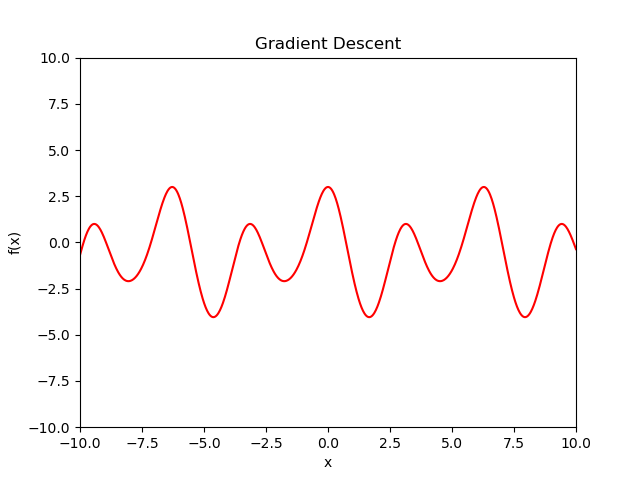

<function matplotlib.pyplot.show(block=None)>

In [3]:
# Define the function and its derivative
def func(x):
    return np.cos(x)**4 - np.sin(x)**3 - 4*np.sin(x)**2 + np.cos(x) + 1

def derivative(x):
    return -4*(np.cos(x)**3)*np.sin(x)-3*(np.sin(x)**2)*np.cos(x) -8*np.sin(x)*np.cos(x) - np.sin(x)

# Animate the gradient descent process
animate_gradient_descent_one_variable(func, derivative, start_point=6.4, learning_rate=0.1)
plt.show